# IE6400 Project 2 - Group 2

### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

### Importing data and handling missing values

In [2]:
missing_values = ['']
df = pd.read_csv('fda_project2_data.csv', na_values = missing_values)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 541909 rows and 8 columns.


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
print(df.dtypes)
print(df.columns)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


### Data Cleaning

In [6]:
df['InvoiceDate'] = df['InvoiceDate'].str.replace('/','-')
df = df.loc[~df.Description.isnull()]
df = df.fillna('NA')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.loc[df.UnitPrice > 0]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns after data cleaning")
print(df.describe())

The dataset has 539392 rows and 8 columns after data cleaning
            Quantity                    InvoiceDate      UnitPrice
count  539392.000000                         539392  539392.000000
mean        9.845904  2011-07-04 16:40:36.232350208       4.673648
min    -80995.000000            2010-12-01 08:26:00       0.001000
25%         1.000000            2011-03-28 11:59:00       1.250000
50%         3.000000            2011-07-20 11:50:00       2.080000
75%        10.000000            2011-10-19 11:49:00       4.130000
max     80995.000000            2011-12-09 12:50:00   38970.000000
std       215.412652                            NaN      94.614722


### Data description

1) The first column is the InvoiceNo. It is unique to an order and an order can have multiple items with in it. InvoiceNo starts with a 'C' if it is a cancelled order.

2) The second column is StockCode. It is unique to an item and is alphanumeric.

3) The third column is Description. It gives a description of each item in an order.

4) The fourth column is Quantity. It is the amount of any given item that's present in an order.

5) The fifth column is InvoiceDate. It is the datetime value of when an order was created.

6) The sixth column is UnitPrice. It is the price of any given item in an order.

7) The seventh column is CustomerID. It is unique to a customer and helps in identifying who placed any given order.

8) The eighth column is Country. It gives the information about where the order was placed.

In [8]:
print(f"The dataset covers a time period from {df.InvoiceDate.min()} to {df.InvoiceDate.max()}")
print(f"There are {len(df['CustomerID'].unique())} unique customers in the dataset")

The dataset covers a time period from 2010-12-01 08:26:00 to 2011-12-09 12:50:00
There are 4372 unique customers in the dataset


### Order count at Customer level

In [9]:
df_co = df[df.InvoiceNo.str[0] != 'C'].groupby('CustomerID')['InvoiceNo'].nunique()
df_co = df_co.reset_index().rename(columns = {'InvoiceNo' : 'Orders'})

In [10]:
df_co

,CustomerID,Orders
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16
4337,18287.0,3


In [11]:
print(f"Customer Churn% is {len(df_co.loc[df_co.Orders <= 1])/len(df_co.loc[df_co.CustomerID != 'NA'])*100:.2f}%")

Customer Churn% is 34.42%


In [12]:
len(df_co.loc[df_co.Orders <= 1])

1493

### Overall Order distribution among customers

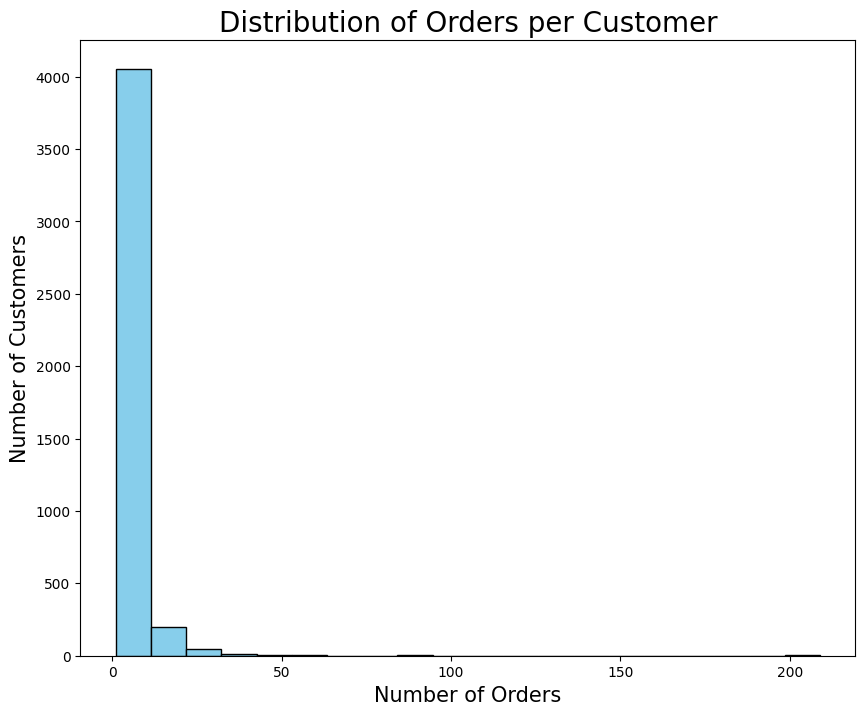

In [13]:
plt.figure(figsize = (10,8))
plt.hist(df_co.loc[df_co.CustomerID != 'NA']['Orders'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Orders per Customer', fontsize=20)
plt.xlabel('Number of Orders', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.show()

### Order distribution among customers with more than 25 orders

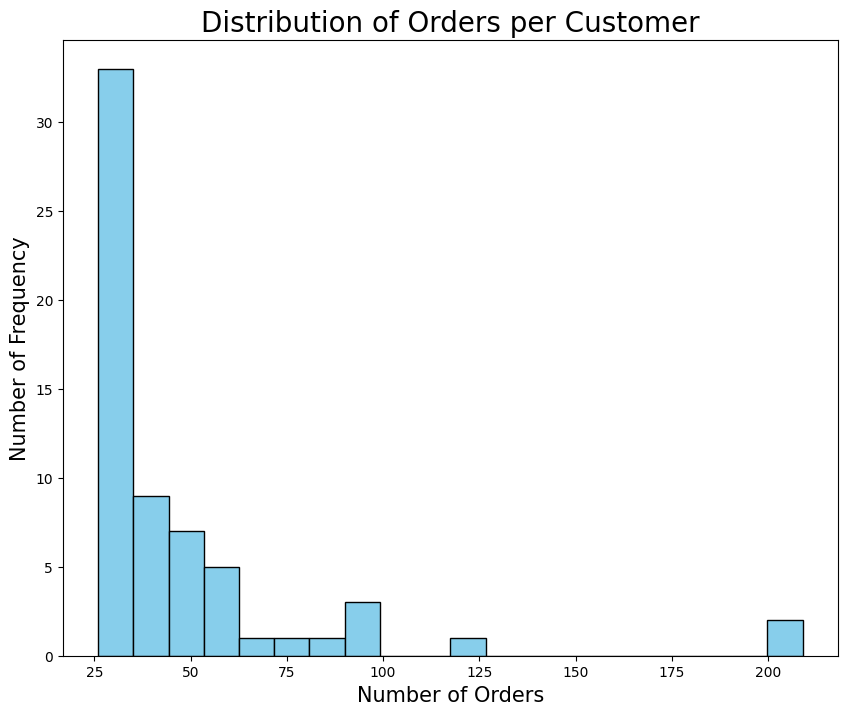

In [14]:
plt.figure(figsize = (10,8))
plt.hist(df_co.loc[(df_co.CustomerID != 'NA')&(df_co.Orders > 25)]['Orders'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Orders per Customer', fontsize=20)
plt.xlabel('Number of Orders', fontsize=15)
plt.ylabel('Number of Frequency', fontsize=15)
plt.show()

### Order distribution among customers with more than 50 orders

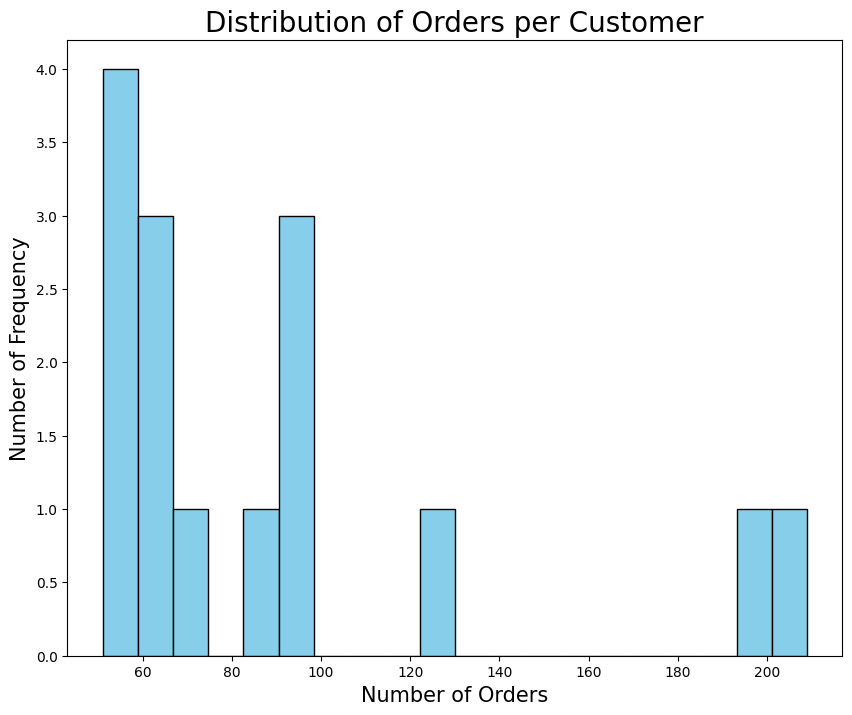

In [15]:
plt.figure(figsize = (10,8))
plt.hist(df_co.loc[(df_co.CustomerID != 'NA')&(df_co.Orders > 50)]['Orders'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Orders per Customer', fontsize=20)
plt.xlabel('Number of Orders', fontsize=15)
plt.ylabel('Number of Frequency', fontsize=15)
plt.show()

### Top 5 Customers

In [16]:
df_top5c = df_co.loc[df_co.CustomerID != 'NA'].sort_values(by = 'Orders', ascending = False)[:5]
df_top5c

,CustomerID,Orders
326,12748.0,209
1879,14911.0,201
4010,17841.0,124
562,13089.0,97
1661,14606.0,93


### Top 10 products based on order count

In [17]:
df_top10p = df['Description'].value_counts()[:10]
df_top10p

Description
WHITE HANGING HEART T-LIGHT HOLDER    2365
REGENCY CAKESTAND 3 TIER              2198
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1726
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64

### Average UnitPrice across products

In [18]:
df_avgp = df.loc[df.Quantity > 0].groupby('Description')['UnitPrice'].mean()
df_avgp

Description
 4 PURPLE FLOCK DINNER CANDLES       2.455366
 50'S CHRISTMAS GIFT BAG LARGE       1.426589
 DOLLY GIRL BEAKER                   1.502123
 I LOVE LONDON MINI BACKPACK         4.611364
 I LOVE LONDON MINI RUCKSACK         4.150000
                                      ...    
ZINC T-LIGHT HOLDER STARS SMALL      0.943673
ZINC TOP  2 DOOR WOODEN SHELF       21.094167
ZINC WILLIE WINKIE  CANDLE STICK     1.089963
ZINC WIRE KITCHEN ORGANISER          9.929375
ZINC WIRE SWEETHEART LETTER TRAY     3.976522
Name: UnitPrice, Length: 4026, dtype: float64

### Revenue generated by each product in each order

In [19]:
df['Revenue'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Top 10 products based on revenue generated

In [20]:
df_rev = df.groupby('Description')['Revenue'].sum()
df_rev = df_rev.reset_index().sort_values(by = 'Revenue', ascending = False)
df_top10r = df_rev[:10]
df_top10r

,Description,Revenue
1074,DOTCOM POSTAGE,206245.48
2864,REGENCY CAKESTAND 3 TIER,164762.19
3859,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
2422,PARTY BUNTING,98302.98
1825,JUMBO BAG RED RETROSPOT,92356.03
2752,RABBIT NIGHT LIGHT,66756.59
2703,POSTAGE,66230.64
2390,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
228,ASSORTED COLOUR BIRD ORNAMENT,58959.73
751,CHILLI LIGHTS,53768.06


### Adding temporal columns

In [21]:
df['year']=df['InvoiceDate'].dt.year
df['month']=df['InvoiceDate'].dt.strftime('%b')
df['month_num'] = df['InvoiceDate'].dt.month
df['day']=df['InvoiceDate'].dt.day
df['weekday']=df['InvoiceDate'].dt.strftime('%A')
df['weekday_num'] = df['InvoiceDate'].dt.strftime('%w')

### Order count grouped by weekdays

In [22]:
df_wdo = df.loc[df.Quantity > 0].groupby(['weekday','weekday_num'])['InvoiceNo'].nunique()
df_wdo = df_wdo.reset_index().rename(columns = {'InvoiceNo' : 'Orders'}).sort_values(by = 'weekday_num')
del df_wdo['weekday_num']
df_wdo

,weekday,Orders
2,Sunday,2204
1,Monday,3126
4,Tuesday,3554
5,Wednesday,3690
3,Thursday,4246
0,Friday,3140


C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


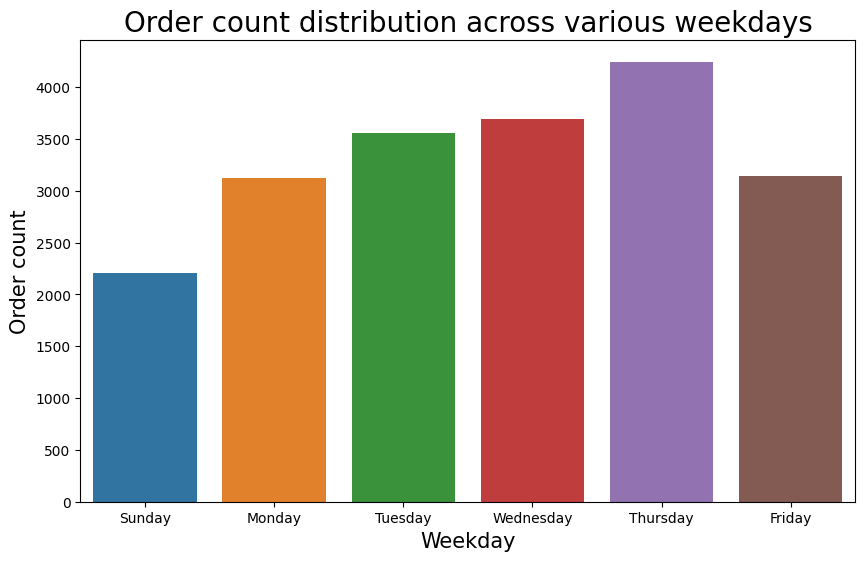

In [23]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'weekday', y = 'Orders', data = df_wdo)
plt.title('Order count distribution across various weekdays', fontsize = 20)
plt.xlabel('Weekday', fontsize = 15)
plt.ylabel('Order count', fontsize = 15)
plt.show()

In [24]:
df['time'] = df['InvoiceDate'].dt.strftime('%H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,year,month,month_num,day,weekday,weekday_num,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,Dec,12,1,Wednesday,3,08:26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,12,1,Wednesday,3,08:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,Dec,12,1,Wednesday,3,08:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,12,1,Wednesday,3,08:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,12,1,Wednesday,3,08:26


In [25]:
def time_bin(x) :
    if x.time() < datetime.time(2) :
        return '00:00-02:00'
    elif x.time() < datetime.time(4) :
        return '02:00-04:00'
    elif x.time() < datetime.time(6) : 
        return '04:00-06:00'
    elif x.time() < datetime.time(8) :
        return '06:00-08:00'
    elif x.time() < datetime.time(10) :
        return '08:00-10:00'
    elif x.time() < datetime.time(12) :
        return '10:00-12:00'
    elif x.time() < datetime.time(14) :
        return '12:00-14:00'
    elif x.time() < datetime.time(16) :
        return '14:00-16:00'
    elif x.time() < datetime.time(18) :
        return '16:00-18:00'
    elif x.time() < datetime.time(20) :
        return '18:00-20:00'
    elif x.time() < datetime.time(22) :
        return '20:00-22:00'
    else :
        return '22:00-00:00'

In [26]:
df['time_bin'] = df['InvoiceDate'].apply(time_bin)
df[['InvoiceDate','time_bin']]

,InvoiceDate,time_bin
0,2010-12-01 08:26:00,08:00-10:00
1,2010-12-01 08:26:00,08:00-10:00
2,2010-12-01 08:26:00,08:00-10:00
3,2010-12-01 08:26:00,08:00-10:00
4,2010-12-01 08:26:00,08:00-10:00
...,...,...
541904,2011-12-09 12:50:00,12:00-14:00
541905,2011-12-09 12:50:00,12:00-14:00
541906,2011-12-09 12:50:00,12:00-14:00
541907,2011-12-09 12:50:00,12:00-14:00


### Order count grouped by timeframes

In [27]:
df_time = df.loc[df.Quantity > 0].groupby('time_bin')['InvoiceNo'].nunique()
df_time = df_time.reset_index().rename(columns = {'InvoiceNo' : 'Orders'})
df_time

,time_bin,Orders
0,06:00-08:00,30
1,08:00-10:00,2050
2,10:00-12:00,4757
3,12:00-14:00,5973
4,14:00-16:00,4793
5,16:00-18:00,2002
6,18:00-20:00,338
7,20:00-22:00,18


C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


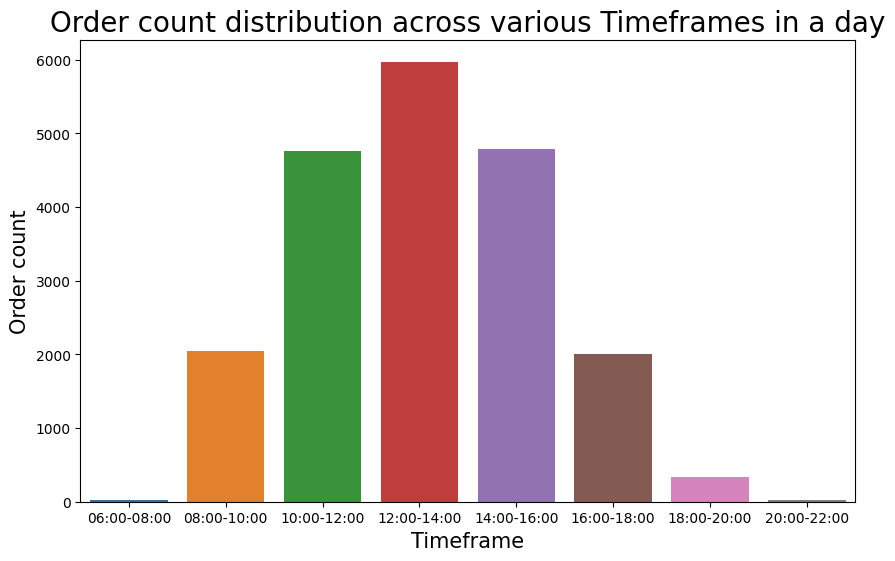

In [28]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'time_bin', y = 'Orders', data = df_time)
plt.title('Order count distribution across various Timeframes in a day', fontsize = 20)
plt.xlabel('Timeframe', fontsize = 15)
plt.ylabel('Order count', fontsize = 15)
plt.show()

### Order count grouped by months

In [29]:
df_month = df.loc[df.Quantity > 0].groupby(['month','month_num'])['InvoiceNo'].nunique()
df_month = df_month.reset_index().rename(columns = {'InvoiceNo' : 'Orders'}).sort_values(by = 'month_num')
del df_month['month_num']
df_month

,month,Orders
4,Jan,1086
3,Feb,1100
7,Mar,1454
0,Apr,1246
8,May,1681
6,Jun,1533
5,Jul,1475
1,Aug,1361
11,Sep,1837
10,Oct,2040


C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


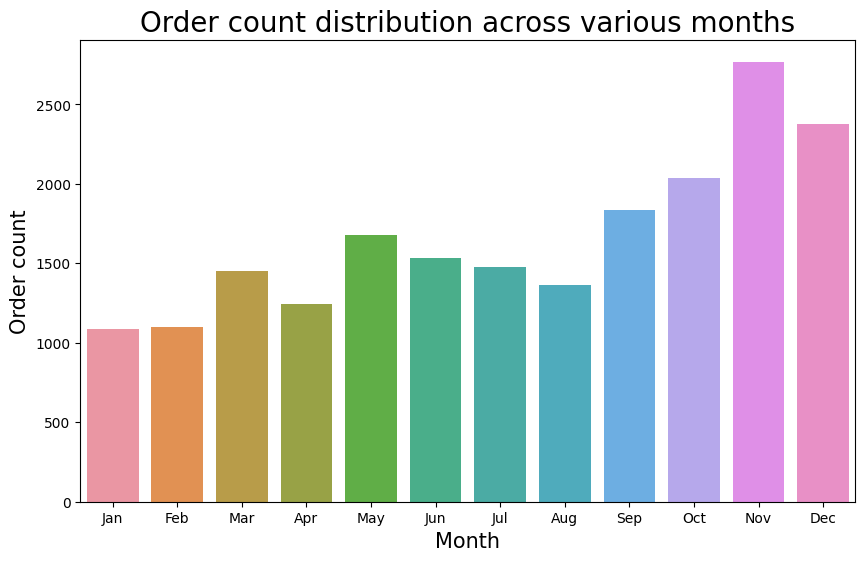

In [30]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'month', y = 'Orders', data = df_month)
plt.title('Order count distribution across various months', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Order count', fontsize = 15)
plt.show()

### Monthly sales trend

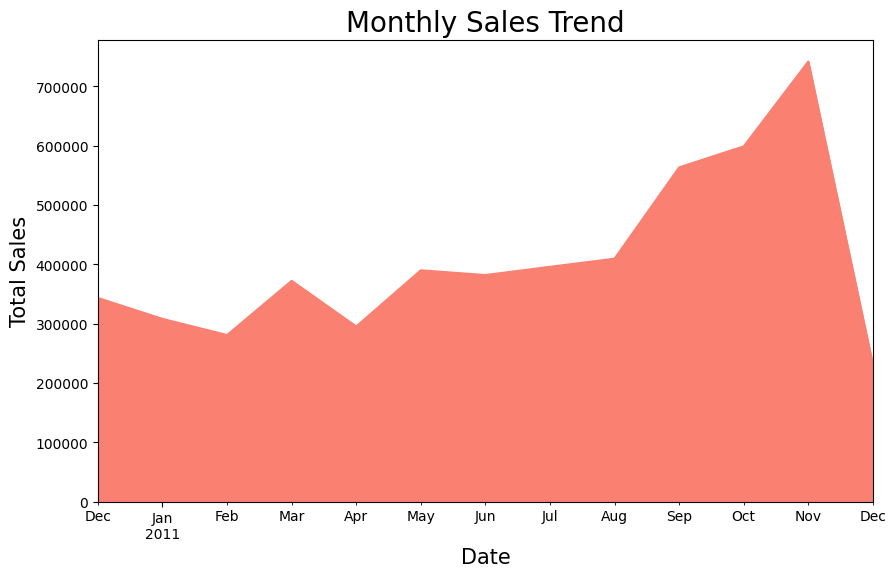

In [31]:
monthly_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum()
plt.figure(figsize = (10,6))
monthly_sales.plot(kind='area', stacked=True, color = 'Salmon')

plt.title('Monthly Sales Trend', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Total Sales', fontsize = 15)

plt.show()

### Top 5 countries based on order count

In [32]:
df_top5_countries = df.loc[df.Quantity > 0].groupby(['Country'])['InvoiceNo'].nunique()
df_top5_countries = df_top5_countries.reset_index().rename(columns = {'InvoiceNo' : 'Orders'}).sort_values(by = 'Orders', ascending = False)[:5]
df_top5_countries

,Country,Orders
36,United Kingdom,18019
14,Germany,457
13,France,392
10,EIRE,288
3,Belgium,98


C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


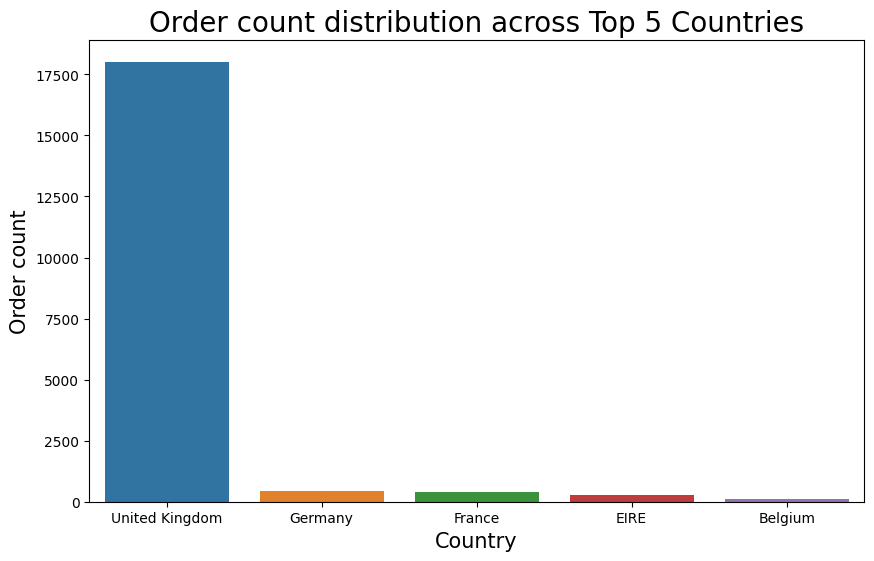

In [33]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Country', y = 'Orders', data = df_top5_countries)
plt.title('Order count distribution across Top 5 Countries', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Order count', fontsize = 15)
plt.show()

### Top 5 countries based on order count excluding UK

C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


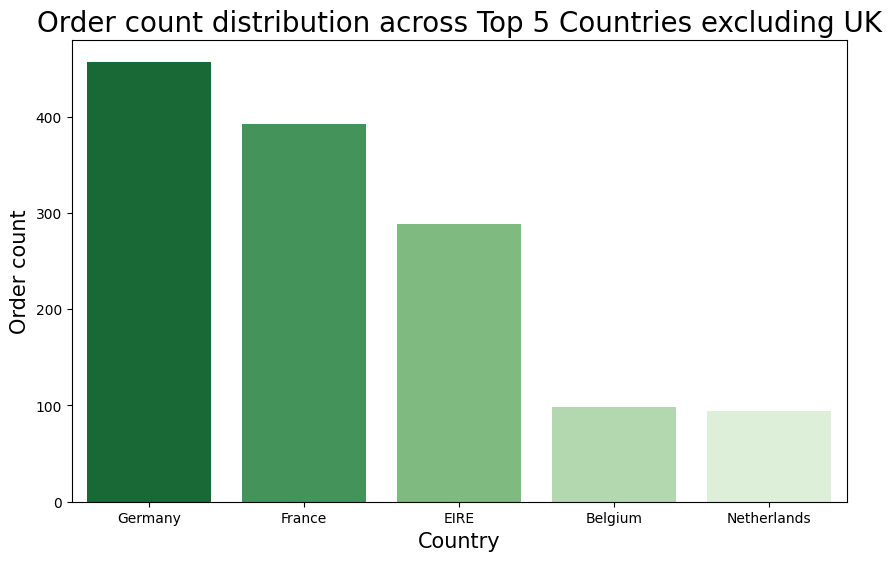

In [34]:
df_top5_countries2 = df.loc[(df.Quantity > 0)&(df.Country != 'United Kingdom')].groupby(['Country'])['InvoiceNo'].nunique()
df_top5_countries2 = df_top5_countries2.reset_index().rename(columns = {'InvoiceNo' : 'Orders'}).sort_values(by = 'Orders', ascending = False)[:5]
df_top5_countries2

plt.figure(figsize = (10,6))
sns.barplot(x = 'Country', y = 'Orders', data = df_top5_countries2, palette="Greens_r")
plt.title('Order count distribution across Top 5 Countries excluding UK', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Order count', fontsize = 15)
plt.show()

In [35]:
df_avg_ov = df.loc[df.CustomerID != 'NA'].groupby(['CustomerID','InvoiceNo','Country'])['Revenue'].sum()
df_avg_ov = df_avg_ov.reset_index()

### Average order value grouped by customer

In [36]:
df_avg_ov = df_avg_ov.loc[df_avg_ov.CustomerID.isin(df_co.loc[(df_co.CustomerID != 'NA')&(df_co.Orders >= 5)]['CustomerID'])]
df_avg_ov = df_avg_ov.groupby(['CustomerID','Country'])['Revenue'].mean()
df_avg_ov = df_avg_ov.reset_index().rename(columns = {'Revenue' : 'Avg_order_value'})
df_avg_ov

,CustomerID,Country,Avg_order_value
0,12347.0,Iceland,615.714286
1,12352.0,Norway,140.491818
2,12362.0,Belgium,396.506154
3,12381.0,Norway,300.660000
4,12383.0,Belgium,306.551667
...,...,...,...
1113,18245.0,United Kingdom,313.445000
1114,18257.0,United Kingdom,188.781667
1115,18260.0,United Kingdom,324.375000
1116,18272.0,United Kingdom,437.825714


C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


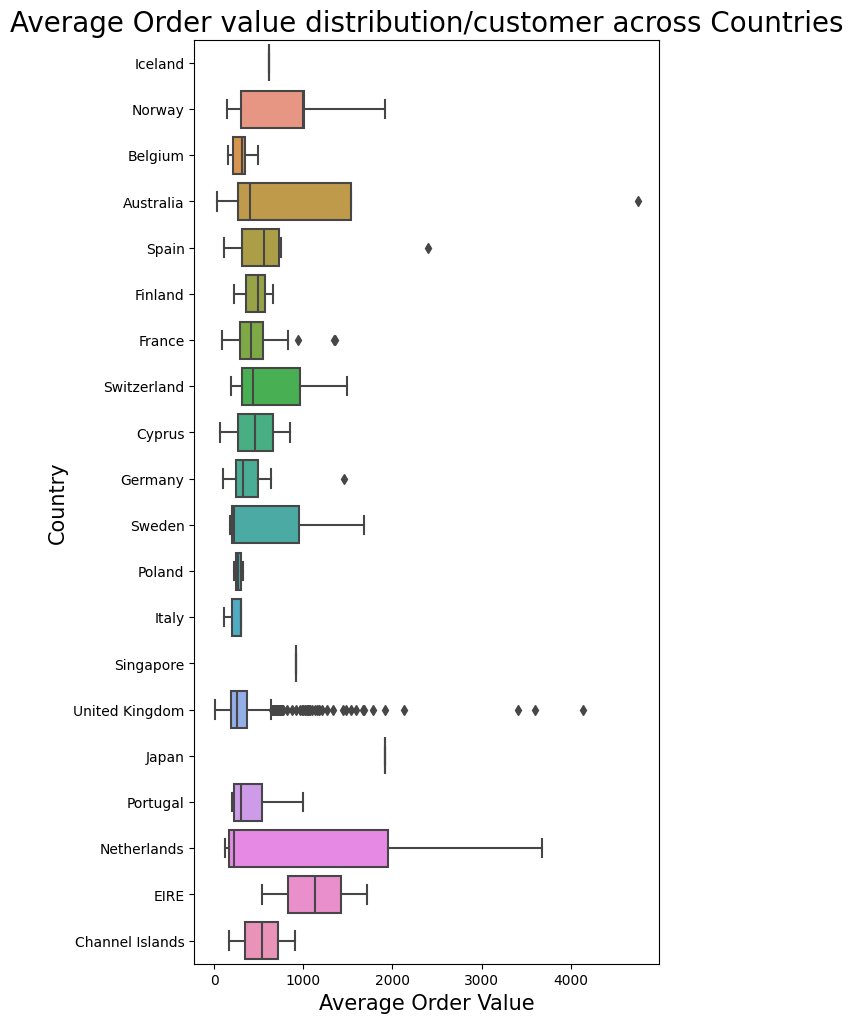

In [37]:
plt.figure(figsize = (6,12))
sns.boxplot(data = df_avg_ov, x = 'Avg_order_value', y = 'Country')
plt.title('Average Order value distribution/customer across Countries', fontsize = 20)
plt.xlabel('Average Order Value', fontsize = 15)
plt.ylabel('Country', fontsize = 15)
plt.show()

### Extracting customer activity based on orders

In [38]:
def first_order(cust_id) :
    return df.loc[df.CustomerID == cust_id]['InvoiceDate'].min()
def last_order(cust_id) :
    return df.loc[df.CustomerID == cust_id]['InvoiceDate'].max()

In [39]:
df_cust = df[['CustomerID']].loc[df.CustomerID != 'NA'].drop_duplicates()
df_cust['First_order_date'] = df_cust['CustomerID'].apply(first_order)
df_cust['Last_order_date'] = df_cust['CustomerID'].apply(last_order)

In [40]:
df_cust

,CustomerID,First_order_date,Last_order_date
0,17850.0,2010-12-01 08:26:00,2011-02-10 14:38:00
9,13047.0,2010-12-01 08:34:00,2011-11-08 12:10:00
26,12583.0,2010-12-01 08:45:00,2011-12-07 08:07:00
46,13748.0,2010-12-01 09:00:00,2011-09-05 09:45:00
65,15100.0,2010-12-01 09:09:00,2011-01-13 17:09:00
...,...,...,...
536969,13436.0,2011-12-08 10:33:00,2011-12-08 10:33:00
537255,15520.0,2011-12-08 10:58:00,2011-12-08 10:58:00
538064,13298.0,2011-12-08 13:11:00,2011-12-08 13:11:00
538812,14569.0,2011-12-08 14:58:00,2011-12-08 14:58:00


In [41]:
df_co = df_co.loc[df_co.CustomerID != 'NA']

In [42]:
df_cust = df_cust.merge(df_co, left_on = 'CustomerID', right_on = 'CustomerID')
df_cust['Days_active'] = df_cust['Last_order_date'] - df_cust['First_order_date']
df_cust

,CustomerID,First_order_date,Last_order_date,Orders,Days_active
0,17850.0,2010-12-01 08:26:00,2011-02-10 14:38:00,34,71 days 06:12:00
1,13047.0,2010-12-01 08:34:00,2011-11-08 12:10:00,10,342 days 03:36:00
2,12583.0,2010-12-01 08:45:00,2011-12-07 08:07:00,15,370 days 23:22:00
3,13748.0,2010-12-01 09:00:00,2011-09-05 09:45:00,5,278 days 00:45:00
4,15100.0,2010-12-01 09:09:00,2011-01-13 17:09:00,3,43 days 08:00:00
...,...,...,...,...,...
4333,13436.0,2011-12-08 10:33:00,2011-12-08 10:33:00,1,0 days 00:00:00
4334,15520.0,2011-12-08 10:58:00,2011-12-08 10:58:00,1,0 days 00:00:00
4335,13298.0,2011-12-08 13:11:00,2011-12-08 13:11:00,1,0 days 00:00:00
4336,14569.0,2011-12-08 14:58:00,2011-12-08 14:58:00,1,0 days 00:00:00


In [43]:
print(f"Average Active Time for a given customer is ~{round(df_cust['Days_active'].mean().total_seconds()/86400)} days")

Average Active Time for a given customer is ~135 days


In [44]:
print(f"Average Active Time for a given customer who ordered at least twice is ~{round(df_cust.loc[df_cust.Orders > 1]['Days_active'].mean().total_seconds()/86400)} days")

Average Active Time for a given customer who ordered at least twice is ~203 days


In [45]:
print(f"Average Active Time for a given customer who ordered at least 5 times is ~{round(df_cust.loc[df_cust.Orders >= 5]['Days_active'].mean().total_seconds()/86400)} days")

Average Active Time for a given customer who ordered at least 5 times is ~282 days


In [46]:
df_cust['Days_active'] = df_cust['Days_active'].apply(lambda x : round(x.total_seconds()/86400))
df_cust['Days_active'] = df_cust['Days_active'].apply(lambda x : 1 if x == 0 else x)
df_cust

,CustomerID,First_order_date,Last_order_date,Orders,Days_active
0,17850.0,2010-12-01 08:26:00,2011-02-10 14:38:00,34,71
1,13047.0,2010-12-01 08:34:00,2011-11-08 12:10:00,10,342
2,12583.0,2010-12-01 08:45:00,2011-12-07 08:07:00,15,371
3,13748.0,2010-12-01 09:00:00,2011-09-05 09:45:00,5,278
4,15100.0,2010-12-01 09:09:00,2011-01-13 17:09:00,3,43
...,...,...,...,...,...
4333,13436.0,2011-12-08 10:33:00,2011-12-08 10:33:00,1,1
4334,15520.0,2011-12-08 10:58:00,2011-12-08 10:58:00,1,1
4335,13298.0,2011-12-08 13:11:00,2011-12-08 13:11:00,1,1
4336,14569.0,2011-12-08 14:58:00,2011-12-08 14:58:00,1,1


In [47]:
df_cust['Order_frequency'] = df_cust['Days_active']/df_cust['Orders']
df_cust

,CustomerID,First_order_date,Last_order_date,Orders,Days_active,Order_frequency
0,17850.0,2010-12-01 08:26:00,2011-02-10 14:38:00,34,71,2.088235
1,13047.0,2010-12-01 08:34:00,2011-11-08 12:10:00,10,342,34.200000
2,12583.0,2010-12-01 08:45:00,2011-12-07 08:07:00,15,371,24.733333
3,13748.0,2010-12-01 09:00:00,2011-09-05 09:45:00,5,278,55.600000
4,15100.0,2010-12-01 09:09:00,2011-01-13 17:09:00,3,43,14.333333
...,...,...,...,...,...,...
4333,13436.0,2011-12-08 10:33:00,2011-12-08 10:33:00,1,1,1.000000
4334,15520.0,2011-12-08 10:58:00,2011-12-08 10:58:00,1,1,1.000000
4335,13298.0,2011-12-08 13:11:00,2011-12-08 13:11:00,1,1,1.000000
4336,14569.0,2011-12-08 14:58:00,2011-12-08 14:58:00,1,1,1.000000


In [48]:
df_cust.loc[df_cust['Orders'] > 1]

,CustomerID,First_order_date,Last_order_date,Orders,Days_active,Order_frequency
0,17850.0,2010-12-01 08:26:00,2011-02-10 14:38:00,34,71,2.088235
1,13047.0,2010-12-01 08:34:00,2011-11-08 12:10:00,10,342,34.200000
2,12583.0,2010-12-01 08:45:00,2011-12-07 08:07:00,15,371,24.733333
3,13748.0,2010-12-01 09:00:00,2011-09-05 09:45:00,5,278,55.600000
4,15100.0,2010-12-01 09:09:00,2011-01-13 17:09:00,3,43,14.333333
...,...,...,...,...,...,...
4286,14126.0,2011-11-29 12:21:00,2011-12-02 11:45:00,3,3,1.000000
4287,16479.0,2011-11-29 13:04:00,2011-11-29 13:40:00,2,1,0.500000
4290,13521.0,2011-11-29 15:09:00,2011-12-08 13:50:00,3,9,3.000000
4295,15060.0,2011-11-30 14:03:00,2011-12-01 13:47:00,4,1,0.250000


### Order frequency for all customers
#### Days taken for each order

C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


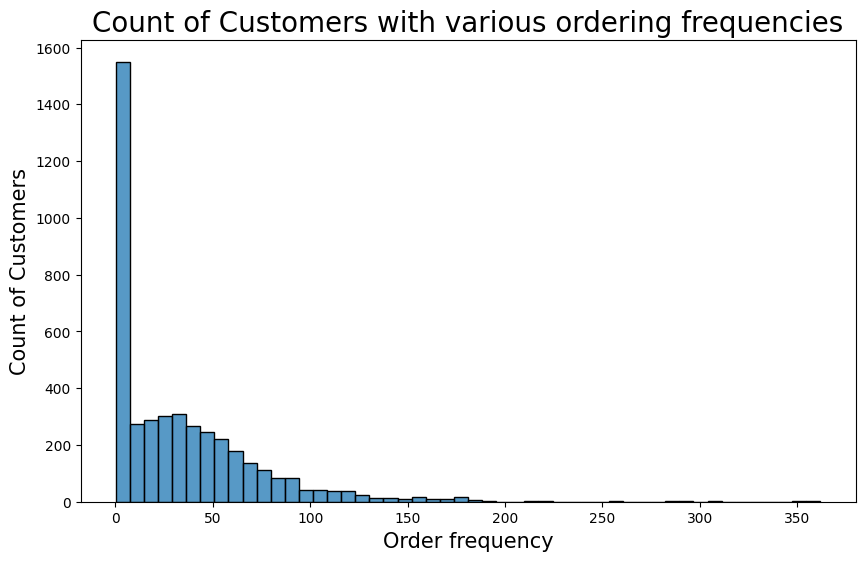

In [49]:
plt.figure(figsize = (10,6))
sns.histplot(df_cust['Order_frequency'], bins = 50)
plt.title('Count of Customers with various ordering frequencies', fontsize = 20)
plt.xlabel('Order frequency', fontsize = 15)
plt.ylabel('Count of Customers', fontsize = 15)
plt.show()

### Order frequency for customers with atleast 5 orders
#### Days taken for each order

C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


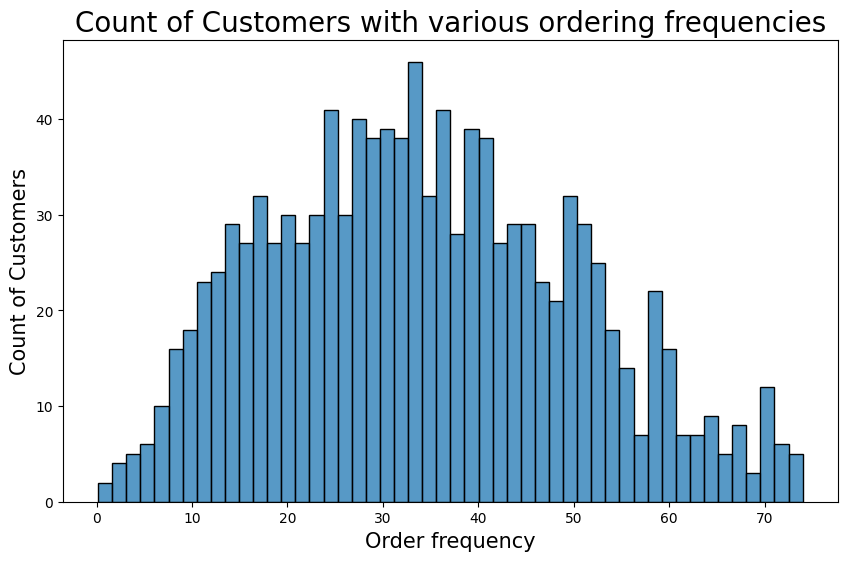

In [50]:
plt.figure(figsize = (10,6))
sns.histplot(df_cust.loc[df_cust.Orders >= 5]['Order_frequency'], bins = 50)
plt.title('Count of Customers with various ordering frequencies', fontsize = 20)
plt.xlabel('Order frequency', fontsize = 15)
plt.ylabel('Count of Customers', fontsize = 15)
plt.show()

### Order frequency for customers with atleast 10 orders
#### Days taken for each order

C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


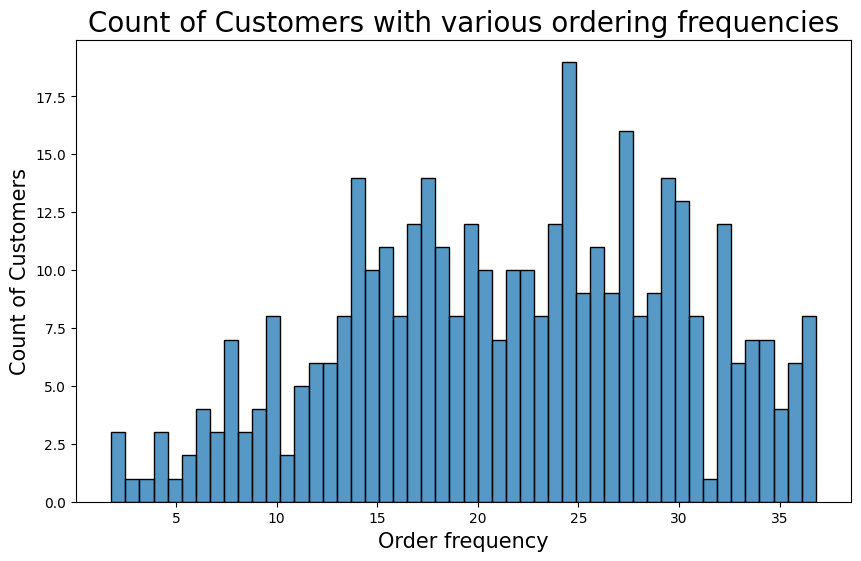

In [51]:
plt.figure(figsize = (10,6))
sns.histplot(df_cust.loc[df_cust.Orders >= 10]['Order_frequency'], bins = 50)
plt.title('Count of Customers with various ordering frequencies', fontsize = 20)
plt.xlabel('Order frequency', fontsize = 15)
plt.ylabel('Count of Customers', fontsize = 15)
plt.show()

### Analysing cancelled orders vs successful orders

In [52]:
df_cancelled = df.loc[df.InvoiceNo.str[0] == 'C']
df_cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,year,month,month_num,day,weekday,weekday_num,time,time_bin
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010,Dec,12,1,Wednesday,3,09:41,08:00-10:00
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010,Dec,12,1,Wednesday,3,09:49,08:00-10:00
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010,Dec,12,1,Wednesday,3,10:24,10:00-12:00
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,Dec,12,1,Wednesday,3,10:24,10:00-12:00
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,Dec,12,1,Wednesday,3,10:24,10:00-12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011,Dec,12,9,Friday,5,09:57,08:00-10:00
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,2011,Dec,12,9,Friday,5,10:28,10:00-12:00
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,2011,Dec,12,9,Friday,5,11:57,10:00-12:00
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011,Dec,12,9,Friday,5,11:58,10:00-12:00


In [53]:
df_successful = df.loc[df.InvoiceNo.str[0] != 'C']
df_successful

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,year,month,month_num,day,weekday,weekday_num,time,time_bin
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,Dec,12,1,Wednesday,3,08:26,08:00-10:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,12,1,Wednesday,3,08:26,08:00-10:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,Dec,12,1,Wednesday,3,08:26,08:00-10:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,12,1,Wednesday,3,08:26,08:00-10:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,Dec,12,1,Wednesday,3,08:26,08:00-10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,Dec,12,9,Friday,5,12:50,12:00-14:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,Dec,12,9,Friday,5,12:50,12:00-14:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,Dec,12,9,Friday,5,12:50,12:00-14:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,Dec,12,9,Friday,5,12:50,12:00-14:00


In [54]:
cancelled_orders = len(df_cancelled['InvoiceNo'].unique())
successful_orders = len(df_successful['InvoiceNo'].unique())
print(f"The percentage of orders that have been cancelled is {cancelled_orders/successful_orders*100:.2f}%")

The percentage of orders that have been cancelled is 19.22%


### Cancellations grouped by products

In [55]:
df_prod = df_cancelled['Description'].value_counts()
df_prod = df_prod.reset_index().rename(columns = {'Description' : 'Cancellations', 'index' : 'Product'})
df_prod

,Cancellations,count
0,Manual,244
1,REGENCY CAKESTAND 3 TIER,181
2,POSTAGE,126
3,JAM MAKING SET WITH JARS,87
4,Discount,77
...,...,...
1967,RETRO LONGBOARD IRONING BOARD COVER,1
1968,DOLLY GIRL CHILDRENS EGG CUP,1
1969,ENGLISH ROSE NOTEBOOK A7 SIZE,1
1970,PINK SMALL JEWELLED PHOTOFRAME,1


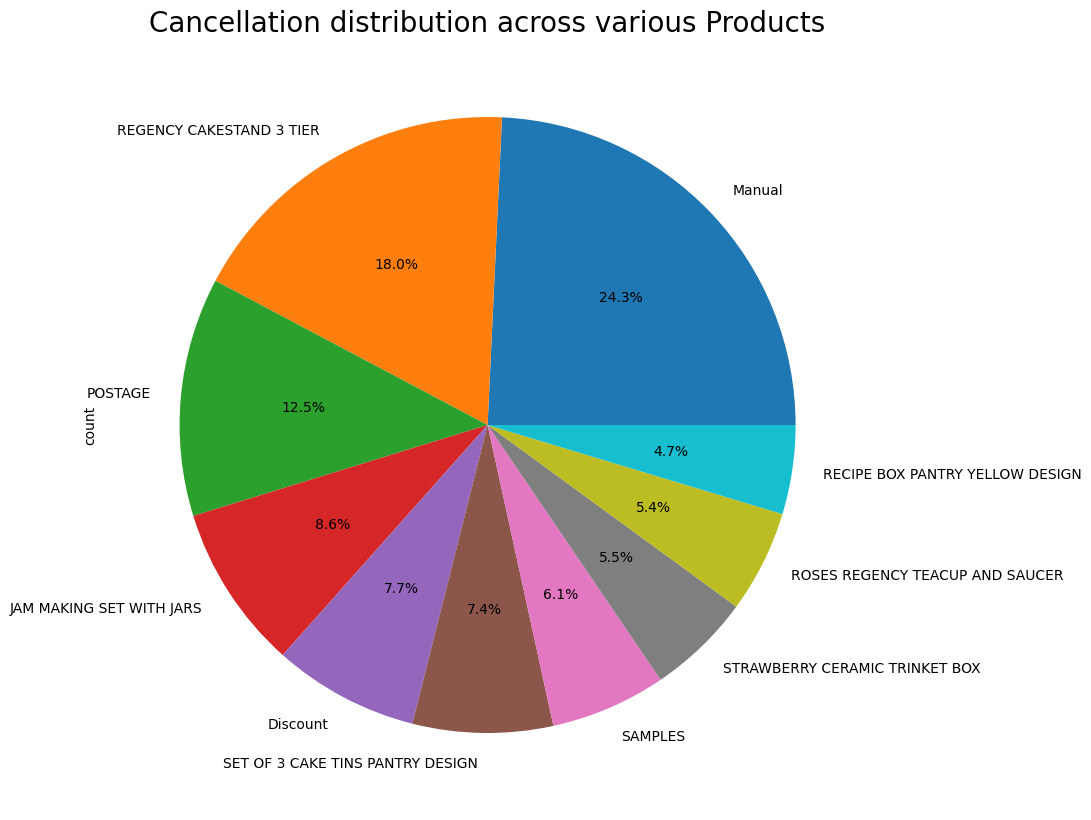

In [56]:
plt.figure(figsize = (10,10))
df_cancelled['Description'].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Cancellation distribution across various Products', fontsize = 20)
plt.show()

### Correlation Heatmap

C:\Users\karni\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


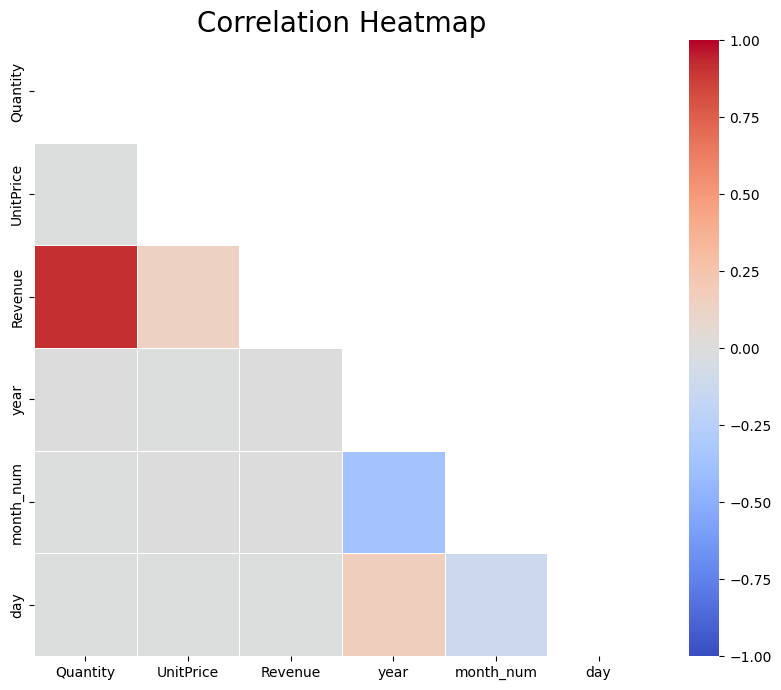

In [98]:
plt.figure(figsize=(10, 8))

corr = df_successful.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, annot=True, fmt=".2f")

plt.title('Correlation Heatmap', fontsize = 20)
plt.show()

## RFM Analysis

### Top customers based on revenue

In [58]:
df2 = df.loc[df['Quantity'] > 0]
df2 = df2.loc[df2.CustomerID != 'NA']

df_m = df2.groupby('CustomerID')['Revenue'].sum()
df_m = pd.DataFrame(df_m).reset_index()
df_m.head()

,CustomerID,Revenue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [59]:
df_f = df2.drop_duplicates(subset=['InvoiceNo']).groupby('CustomerID')['InvoiceNo'].count()
df_f = pd.DataFrame(df_f).reset_index().rename(columns = {'InvoiceNo':'Orders'})
df_f.head()

,CustomerID,Orders
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


### Defining Recency parameter

In [60]:
def recency_correction(recency):
    ans = str(recency).split(' ')[0]
    return(int(ans))

In [61]:
today = df2['InvoiceDate'].max()
today

df2['rank'] = df2.sort_values(['CustomerID','InvoiceDate']).groupby(['CustomerID'])['InvoiceDate'].rank(method='min').astype(int)

df_r = df2[df2['rank'] == 1]
df_r['recency'] = pd.to_datetime('2011-12-10') - df_r['InvoiceDate']

df_r['recency'] = df_r['recency'].apply(recency_correction)

df_r = df_r[['CustomerID','recency']]
df_r = df_r.drop_duplicates()
df_r.head()

C:\Users\karni\AppData\Local\Temp\ipykernel_3648\3384797812.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['recency'] = pd.to_datetime('2011-12-10') - df_r['InvoiceDate']
C:\Users\karni\AppData\Local\Temp\ipykernel_3648\3384797812.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['recency'] = df_r['recency'].apply(recency_cerrection)


,CustomerID,recency
0,17850.0,373
9,13047.0,373
26,12583.0,373
46,13748.0,373
65,15100.0,373


### RFM modeling

In [62]:
df_rfm = df_f.merge(df_m, on='CustomerID').merge(df_r, on='CustomerID')
df_rfm.columns = ['CustomerID', 'Frequency', 'Monetary', 'Recency']
df_rfm.head()

,CustomerID,Frequency,Monetary,Recency
0,12346.0,1,77183.60,325
1,12347.0,7,4310.00,367
2,12348.0,4,1797.24,358
3,12349.0,1,1757.55,18
4,12350.0,1,334.40,310


In [63]:
def get_group(Q1, Q2, Q3, value):
    if value <= Q1:
        return '1'
    elif Q1 < value <= Q2:
        return '2'
    elif Q2 < value <= Q3:
        return '3'
    elif Q3 < value:
        return '4'

In [64]:
freq_Q1, freq_Q2, freq_Q3 = df_rfm['Frequency'].quantile([0.25,0.5,0.75])
rece_Q1, rece_Q2, rece_Q3 = df_rfm['Recency'].quantile([0.25,0.5,0.75])
mone_Q1, mone_Q2, mone_Q3 = df_rfm['Monetary'].quantile([0.25,0.5,0.75])

#Frequency bins
freq_group = []
for i in range(len(df_rfm)):
    freq = df_rfm.iloc[i]['Frequency']
    freq_group.append(get_group(freq_Q1, freq_Q2, freq_Q3, freq)) 

df_rfm['freq_group'] = freq_group

#Monetary bins
monetary_group = []
for i in range(len(df_rfm)):
    monetary = df_rfm.iloc[i]['Monetary']
    monetary_group.append(get_group(mone_Q1, mone_Q2, mone_Q3, monetary)) 

df_rfm['monetary_group'] = monetary_group

#Recency bins
recency_group = []
for i in range(len(df_rfm)):
    recency = df_rfm.iloc[i]['Recency']
    recency_group.append(get_group(rece_Q1, rece_Q2, rece_Q3, recency)) 

df_rfm['recency_group'] = recency_group

df_rfm.head()

,CustomerID,Frequency,Monetary,Recency,freq_group,monetary_group,recency_group
0,12346.0,1,77183.60,325,1,4,3
1,12347.0,7,4310.00,367,4,4,4
2,12348.0,4,1797.24,358,3,4,4
3,12349.0,1,1757.55,18,1,4,1
4,12350.0,1,334.40,310,1,2,3


In [65]:
df_rfm['rfm'] = df_rfm['recency_group'] + df_rfm['freq_group'] + df_rfm['monetary_group']
df_rfm.head()

,CustomerID,Frequency,Monetary,Recency,freq_group,monetary_group,recency_group,rfm
0,12346.0,1,77183.60,325,1,4,3,314
1,12347.0,7,4310.00,367,4,4,4,444
2,12348.0,4,1797.24,358,3,4,4,434
3,12349.0,1,1757.55,18,1,4,1,114
4,12350.0,1,334.40,310,1,2,3,312


### Segmentation based on RFM scores

In [66]:
def get_segment(rfm):
    if rfm == '144':
        return 'Best'
    elif rfm == '344':
        return 'Almost Lost'
    elif rfm == '444':
        return 'Lost Big Spenders'
    elif rfm[1] == '4':
        return 'Loyal'
    elif rfm[2] == '4':
        return 'Big Spenders'
    else:
        return 'Normal'

In [67]:
df_rfm['Segment'] = df_rfm['rfm'].apply(get_segment)
df_rfm.head()

,CustomerID,Frequency,Monetary,Recency,freq_group,monetary_group,recency_group,rfm,Segment
0,12346.0,1,77183.60,325,1,4,3,314,Big Spenders
1,12347.0,7,4310.00,367,4,4,4,444,Lost Big Spenders
2,12348.0,4,1797.24,358,3,4,4,434,Big Spenders
3,12349.0,1,1757.55,18,1,4,1,114,Big Spenders
4,12350.0,1,334.40,310,1,2,3,312,Normal


### Correlation between RFM parameters

C:\Users\karni\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


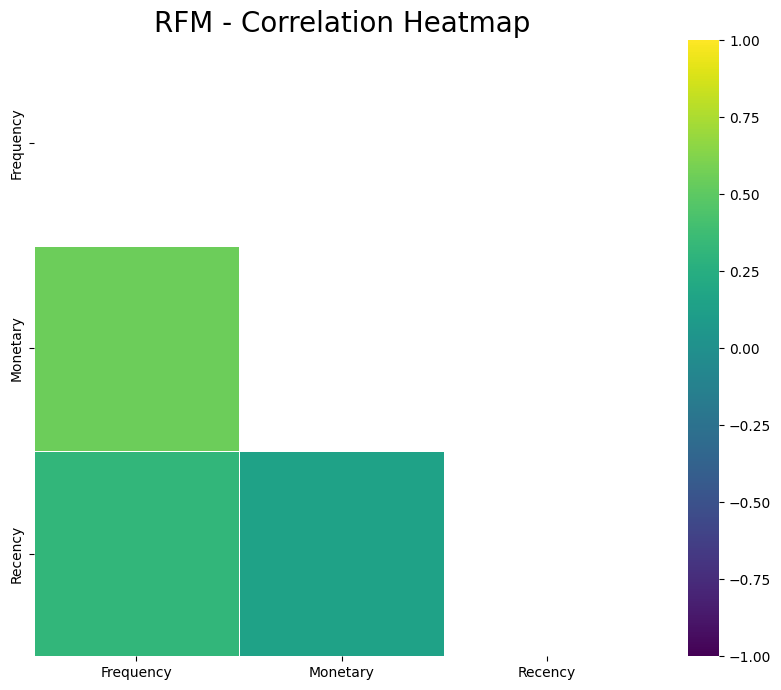

In [68]:
plt.figure(figsize=(10, 8))

corr2 = df_rfm.corr(numeric_only=True)
mask2 = np.triu(np.ones_like(corr2, dtype=bool))

sns.heatmap(corr2, mask=mask2, cmap='viridis', vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, annot=True, fmt=".2f")

plt.title('RFM - Correlation Heatmap', fontsize = 20)
plt.show()

In [69]:
df_cust_seg = df_rfm[['CustomerID','Segment']]
df_cust_seg.head()

,CustomerID,Segment
0,12346.0,Big Spenders
1,12347.0,Lost Big Spenders
2,12348.0,Big Spenders
3,12349.0,Big Spenders
4,12350.0,Normal


### Customer distribution across various segments

In [70]:
segment_group = df_cust_seg.groupby('Segment').count()
segment_group = segment_group.reset_index()
segment_group.columns = ['Segment', 'Count']
segment_group

,Segment,Count
0,Almost Lost,198
1,Best,23
2,Big Spenders,362
3,Lost Big Spenders,440
4,Loyal,211
5,Normal,3104


C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


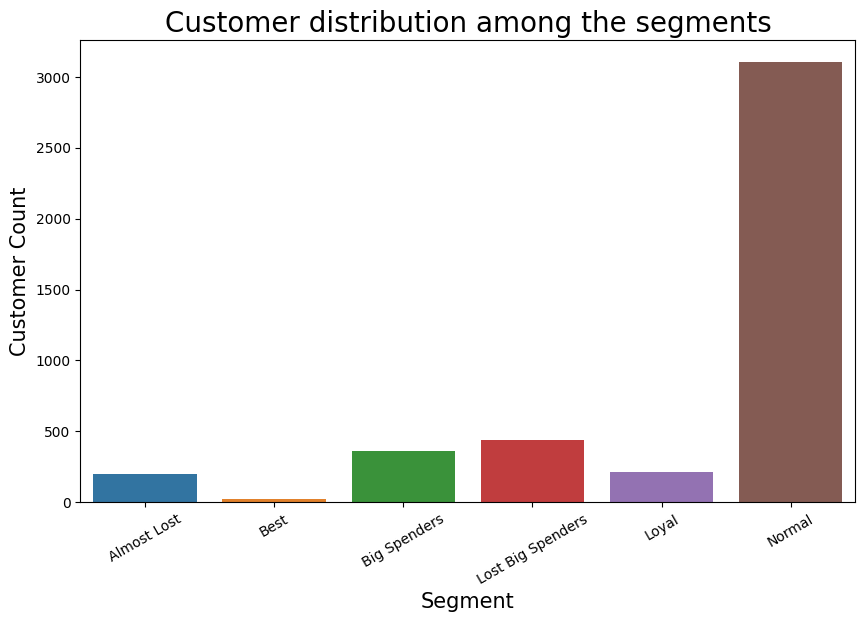

In [71]:
plt.figure(figsize = (10,6))
seg_plot = sns.barplot(x = 'Segment', y = 'Count', data = segment_group)
plt.title('Customer distribution among the segments', fontsize = 20)
plt.xlabel('Segment', fontsize = 15)
plt.ylabel('Customer Count', fontsize = 15)
seg_plot.set_xticklabels(seg_plot.get_xticklabels(), rotation = 30)
plt.show()

## Clustering using K-Means

### Order frequency against customers based on item count

In [72]:
df_items = df2['CustomerID'].value_counts()
df_items = df_items.reset_index().rename(columns = {'Frequency' : 'CustomerID', 'count' : 'Frequency'})
df_items

,CustomerID,Frequency
0,17841.0,7847
1,14911.0,5675
2,14096.0,5111
3,12748.0,4595
4,14606.0,2700
...,...,...
4333,18184.0,1
4334,13185.0,1
4335,16073.0,1
4336,17948.0,1


In [73]:
rfm_df = df_rfm[['CustomerID','Recency','Monetary']]
rfm_df = rfm_df.merge(df_items, on = 'CustomerID')
rfm_df

,CustomerID,Recency,Monetary,Frequency
0,12346.0,325,77183.60,1
1,12347.0,367,4310.00,182
2,12348.0,358,1797.24,31
3,12349.0,18,1757.55,73
4,12350.0,310,334.40,17
...,...,...,...,...
4333,18280.0,277,180.60,10
4334,18281.0,180,80.82,7
4335,18282.0,126,178.05,12
4336,18283.0,337,2094.88,756


### Identifying Outliers for Monetary and Frequency values before clustering

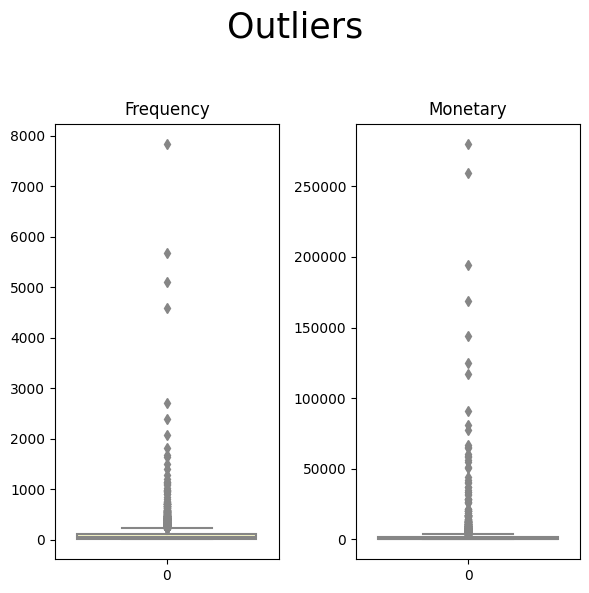

In [74]:
df_cl = rfm_df[['Frequency','Monetary']]
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df_cl['Frequency'], palette='Spectral').set_title("Frequency")
sns.boxplot(ax=axes[1], data=df_cl['Monetary'], palette='Spectral').set_title("Monetary")

plt.tight_layout()

In [75]:
from sklearn.ensemble import IsolationForest
df_cl2 = df_cl.copy()

In [76]:
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df_cl2)

IsolationForest(contamination=0.1, n_estimators=150)

In [77]:
scores=model.decision_function(df_cl2)
anomaly=model.predict(df_cl2)

df_cl2['scores']=scores
df_cl2['anomaly']=anomaly

anomaly = df_cl2.loc[df_cl2['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 434


In [78]:
df_cl2 = df_cl2.drop(anomaly_index, axis = 0).reset_index(drop=True)

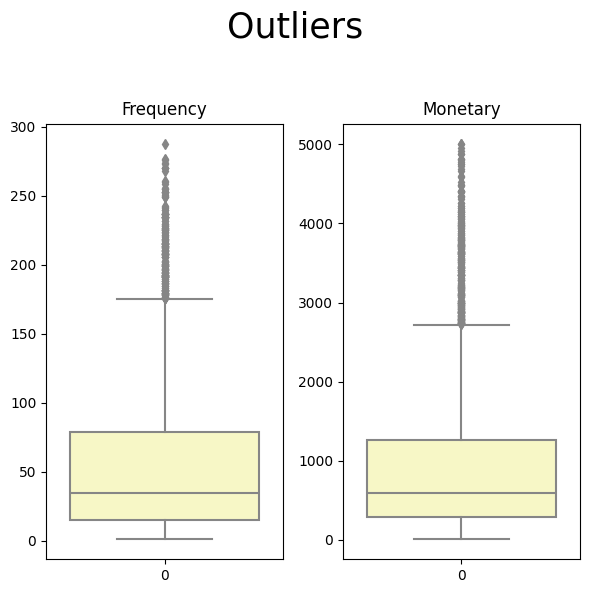

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df_cl2['Frequency'], palette='Spectral').set_title("Frequency")
sns.boxplot(ax=axes[1], data=df_cl2['Monetary'], palette='Spectral').set_title("Monetary")

plt.tight_layout()

In [80]:
df_cl2.drop(['scores', 'anomaly'], axis = 1, inplace =True)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cl3_array = scaler.fit_transform(df_cl2)
df_cl3 = pd.DataFrame(df_cl3_array, columns=df_cl2.columns)
df_cl3

,Frequency,Monetary
0,2.295786,3.594466
1,-0.447132,0.921930
2,0.315799,0.879716
3,-0.701442,-0.633926
4,0.533779,1.675800
...,...,...
3899,-0.846763,-0.804632
3900,-0.828598,-0.797506
3901,-0.883093,-0.903630
3902,-0.792268,-0.800218


### Calculating optimum cluster count

C:\Users\karni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

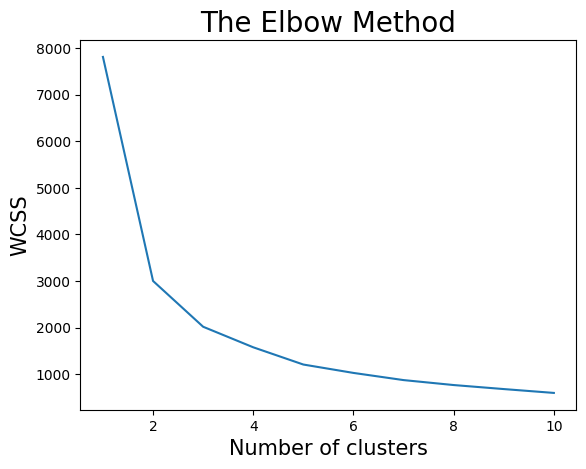

In [82]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_cl3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

In [83]:
df_kmeans = pd.DataFrame(df_cl3).rename(columns = {0 : 'Frequency', 1 : 'Monetary'})
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(df_kmeans)

df_kmeans = df_cl2.copy()
df_kmeans['Cluster'] = y_kmeans
df_kmeans['Cluster'].value_counts()

C:\Users\karni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
0    1937
4     859
2     444
5     306
1     215
3     143
Name: count, dtype: int64

In [84]:
df_kmeans

,Frequency,Monetary,Cluster
0,182,4310.00,1
1,31,1797.24,4
2,73,1757.55,2
3,17,334.40,0
4,85,2506.04,2
...,...,...,...
3899,9,173.90,0
3900,10,180.60,0
3901,7,80.82,0
3902,12,178.05,0


### Clusters based on Frequency and Monetary values

C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

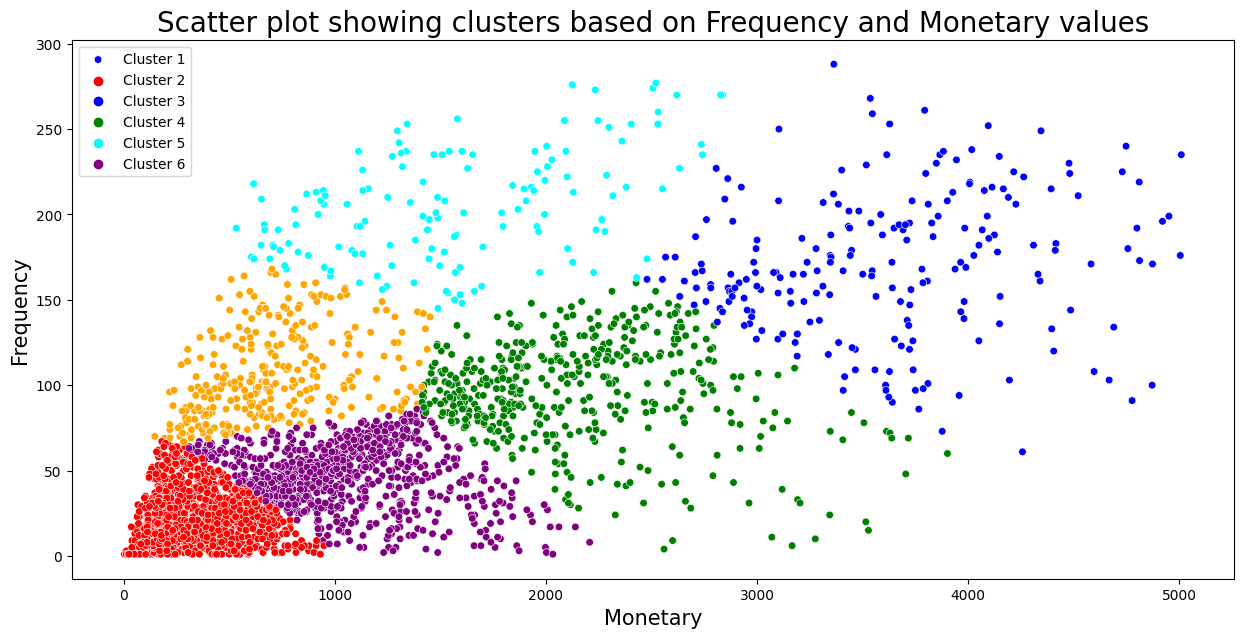

In [85]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_kmeans, x='Monetary', y='Frequency', hue = 'Cluster', s=30, palette={0:'Red',1:'Blue',2:'Green',3:'Cyan',4:'Purple',5:'Orange'})
plt.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6'])
plt.title('Scatter plot showing clusters based on Frequency and Monetary values', fontsize = 20)
plt.xlabel('Monetary', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

### Identifying outliers for Monetary and Recency values before clustering

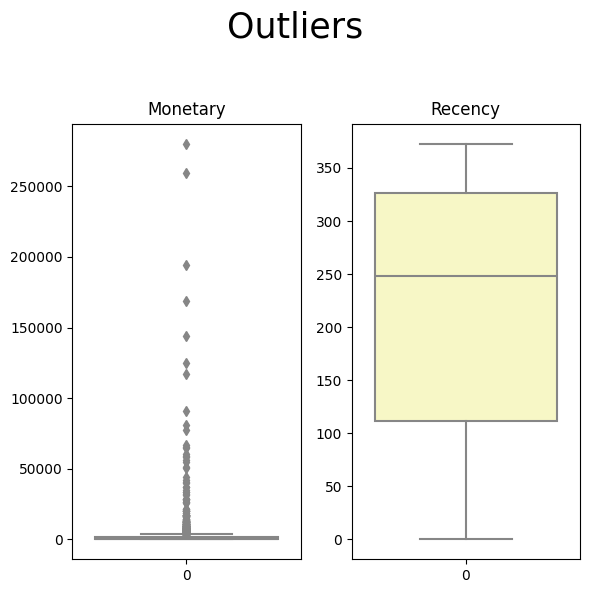

In [86]:
df2_cl = rfm_df[['Monetary','Recency']]
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df2_cl['Monetary'], palette='Spectral').set_title("Monetary")
sns.boxplot(ax=axes[1], data=df2_cl['Recency'], palette='Spectral').set_title("Recency")

plt.tight_layout()

In [87]:
from sklearn.ensemble import IsolationForest
df2_cl2 = df2_cl.copy()

In [88]:
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df2_cl2)

IsolationForest(contamination=0.1, n_estimators=150)

In [89]:
scores=model.decision_function(df2_cl2)
anomaly=model.predict(df2_cl2)

df2_cl2['scores']=scores
df2_cl2['anomaly']=anomaly

anomaly = df2_cl2.loc[df2_cl2['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 434


In [90]:
df2_cl2 = df2_cl2.drop(anomaly_index, axis = 0).reset_index(drop=True)

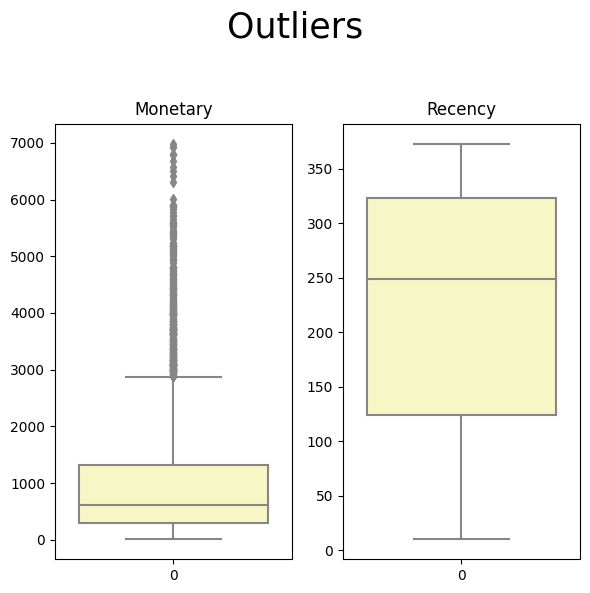

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df2_cl2['Monetary'], palette='Spectral').set_title("Monetary")
sns.boxplot(ax=axes[1], data=df2_cl2['Recency'], palette='Spectral').set_title("Recency")

plt.tight_layout()

In [92]:
df2_cl2.drop(['scores', 'anomaly'], axis = 1, inplace =True)

In [93]:
df2_cl3=scaler.fit_transform(df2_cl2)
df2_cl3

array([[ 2.94729162,  1.24209756],
       [ 0.69460765,  1.16331167],
       [-0.61682529,  0.74312027],
       ...,
       [-0.75699273, -0.86761345],
       [ 0.96144127,  0.97947793],
       [ 0.73050342, -0.21106438]])

C:\Users\karni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

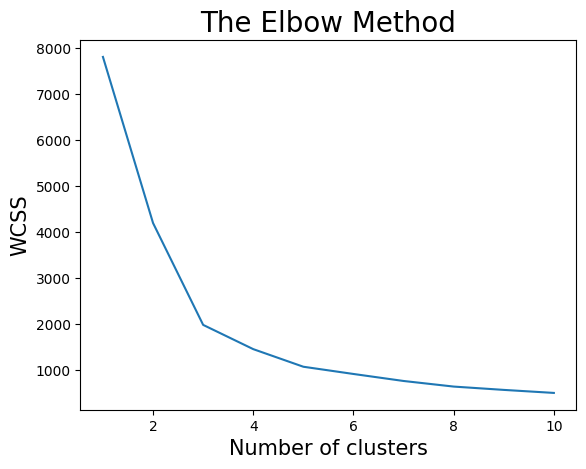

In [94]:
wcss2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(df2_cl3)
    wcss2.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss2)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

In [95]:
df_kmeans2 = pd.DataFrame(df2_cl3).rename(columns = {0 : 'Monetary', 1 : 'Recency'})
kmeans2 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 1)
y_kmeans2 = kmeans2.fit_predict(df_kmeans2)

df_kmeans2 = df2_cl2.copy()
df_kmeans2['Cluster'] = y_kmeans2
df_kmeans2['Cluster'].value_counts()

C:\Users\karni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
3    1037
5     972
1     812
2     498
4     371
0     214
Name: count, dtype: int64

In [96]:
df_kmeans2

,Monetary,Recency,Cluster
0,4310.00,367,0
1,1797.24,358,2
2,334.40,310,5
3,2506.04,296,2
4,89.00,204,1
...,...,...,...
3899,180.60,277,1
3900,80.82,180,1
3901,178.05,126,3
3902,2094.88,337,2


### Clusters based on Recency and Monetary values

C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

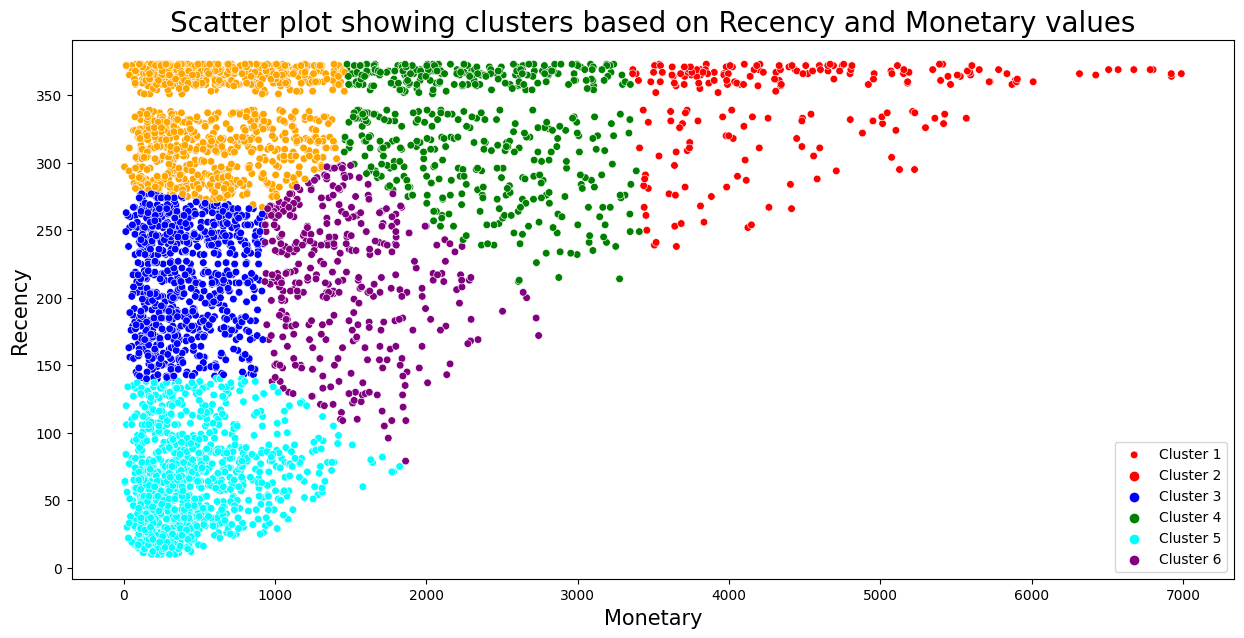

In [97]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_kmeans2, x='Monetary', y='Recency', hue = 'Cluster', s=30, palette={0:'Red',1:'Blue',2:'Green',3:'Cyan',4:'Purple',5:'Orange'})
plt.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6'])
plt.title('Scatter plot showing clusters based on Recency and Monetary values', fontsize = 20)
plt.xlabel('Monetary', fontsize = 15)
plt.ylabel('Recency', fontsize = 15)
plt.show()

#### Last Updated on 12/01/2023